##Cohort Analysis with Python

Here is a cohort analysis for all months of the database [Online Retail II Data Set from ML Repository](https://www.kaggle.com/datasets/mathchi/online-retail-ii-data-set-from-ml-repository).

In [62]:
#Import libraries

import pandas as pd
import numpy as np
import datetime

!pip install names
import names
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

from operator import attrgetter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
#Reading 2 DataFrames

df = pd.read_csv('Year 2009-2010.csv', encoding='ISO-8859-1')
df1 = pd.read_csv('Year 2010-2011.csv', encoding='ISO-8859-1')

In [64]:
#Exploratory Data Analysis of the first DataFrame

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [66]:
#Exploratory Data Analysis of the second DataFrame

df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [68]:
print('df dataframe dimensions:', df.shape)
print('df1 dataframe dimensions:', df1.shape)

df dataframe dimensions: (525461, 8)
df1 dataframe dimensions: (541910, 8)


In [69]:
#Deleting missing values

df.dropna(inplace=True)
df1.dropna(inplace=True)

In [70]:
#Deleting duplucates

df.drop_duplicates(inplace=True)
df1.drop_duplicates(inplace=True)

In [71]:
#Descriptive Statistics

df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Quantity,410763.0,13.0,102.0,-9360.0,2.0,5.0,12.0,19152.0
Price,410763.0,4.0,72.0,0.0,1.0,2.0,4.0,25111.0
Customer ID,410763.0,15354.0,1682.0,12346.0,13979.0,15311.0,16797.0,18287.0


In [72]:
df1.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401605.0,12.0,250.0,-80995.0,2.0,5.0,12.0,80995.0
Price,401605.0,3.0,70.0,0.0,1.0,2.0,4.0,38970.0
Customer ID,401605.0,15281.0,1714.0,12346.0,13939.0,15145.0,16784.0,18287.0


In [73]:
#Combine 2 datasets in one

data = [df, df1]
len(data)

2

In [74]:
result = pd.concat(data)

In [75]:
#New dataset descriptive Statistics 

result.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Quantity,812368.0,13.0,190.0,-80995.0,2.0,5.0,12.0,80995.0
Price,812368.0,4.0,71.0,0.0,1.0,2.0,4.0,38970.0
Customer ID,812368.0,15318.0,1698.0,12346.0,13969.0,15245.0,16794.0,18287.0


In [76]:
#Filter the Quantity only > 0 because negative values can't be used in cohort

result1 = result[(result['Quantity'] > 0)]

In [77]:
#Convert the type of columns for cohort. In cohort we need cohort group, cohort period and payment

result1['InvoiceDate'] = pd.to_datetime(result1['InvoiceDate'], format='%m/%d/%Y %H:%M') 
result1['order_month'] = result1['InvoiceDate'].dt.to_period('M') 
result1['cohort'] = result1.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [78]:
#Aggregate the data per cohort and order_month and count the number of unique customers in each group

df_c = result1.groupby(['cohort', 'order_month']).agg(n_customers=('Customer ID', 'nunique')).reset_index(drop=False)
df_c['period_number'] = (df_c.order_month - df_c.cohort).apply(attrgetter('n'))

In [79]:
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2009-12,2009-12,955,0
1,2009-12,2010-01,337,1
2,2009-12,2010-02,319,2
3,2009-12,2010-03,406,3
4,2009-12,2010-04,363,4


In [80]:
#Aggregate the data per cohort and a month, getting the number of unique customers in each month

pivot = df_c.pivot_table(index='cohort', columns='period_number', values='n_customers')

In [81]:
pivot

period_number,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
cohort,,,,,,,,,,,,,,,,,,,,,
2009-12,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,...,289.0,251.0,289.0,270.0,248.0,244.0,301.0,291.0,389.0,188.0
2010-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,...,58.0,90.0,76.0,71.0,75.0,93.0,74.0,94.0,22.0,NaN
2010-02,376.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,...,75.0,60.0,61.0,54.0,86.0,86.0,61.0,22.0,NaN,NaN
2010-03,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,48.0,...,75.0,77.0,69.0,78.0,89.0,94.0,35.0,NaN,NaN,NaN
2010-04,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,31.0,32.0,...,46.0,41.0,44.0,53.0,66.0,17.0,NaN,NaN,NaN,NaN
2010-05,254.0,40.0,43.0,44.0,45.0,65.0,54.0,32.0,15.0,21.0,...,32.0,35.0,42.0,39.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,47.0,51.0,55.0,62.0,77.0,34.0,24.0,22.0,32.0,...,33.0,36.0,55.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,29.0,34.0,55.0,54.0,26.0,21.0,27.0,27.0,21.0,...,32.0,44.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,33.0,48.0,52.0,28.0,19.0,16.0,20.0,22.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
cohort_size = pivot.iloc[:, 0]

In [83]:
#Plot the retention matrix as a heatmap

retention_matrix = pivot.divide(cohort_size, axis=0)

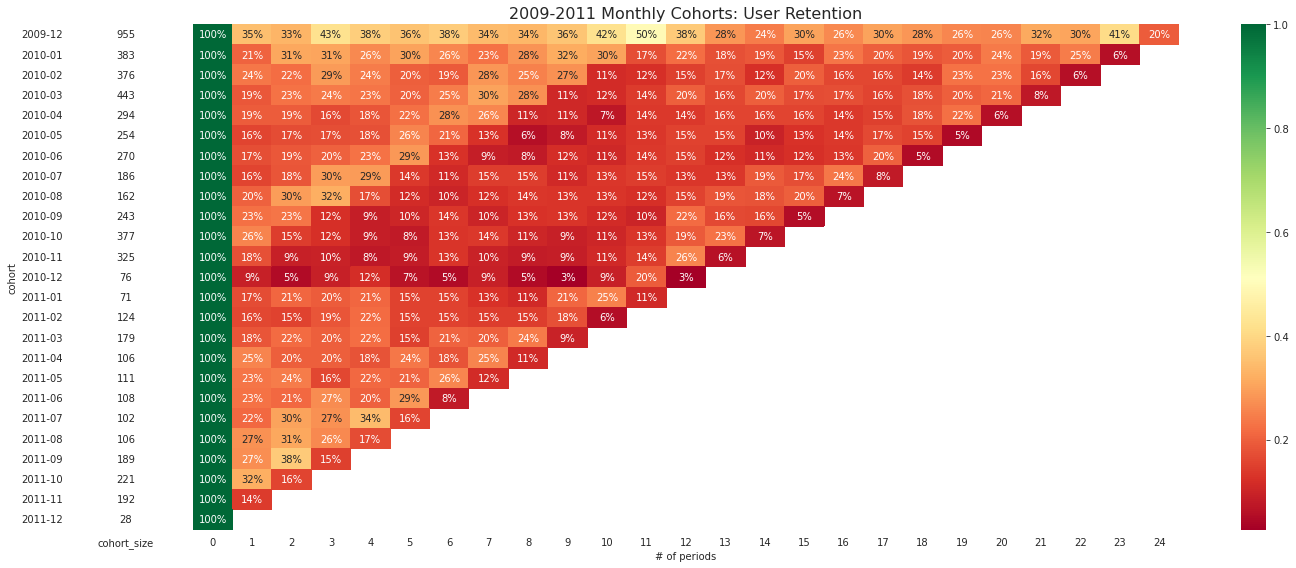

In [85]:
import matplotlib.colors as mcolors

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('2009-2011 Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()